In [7]:
import numpy as np

import matplotlib.pyplot as plt
plt.style.use('bmh')
%matplotlib widget

### Argument list and corresponding values of functions $x \rightarrow x^2$ and $x \rightarrow \sin(x)$
Let's try to calculate the gradient of the function with values given.

In [8]:
# argument data
lbound, rbound, num = -2, 2, 7
arg_pts = np.linspace(lbound, rbound, num=num)

In [9]:
# gradients for x**2:
pow2_pts = np.power(arg_pts, 2)

pow2_num_grad = np.gradient(pow2_pts,arg_pts)
pow2_tru_grad = 2*arg_pts

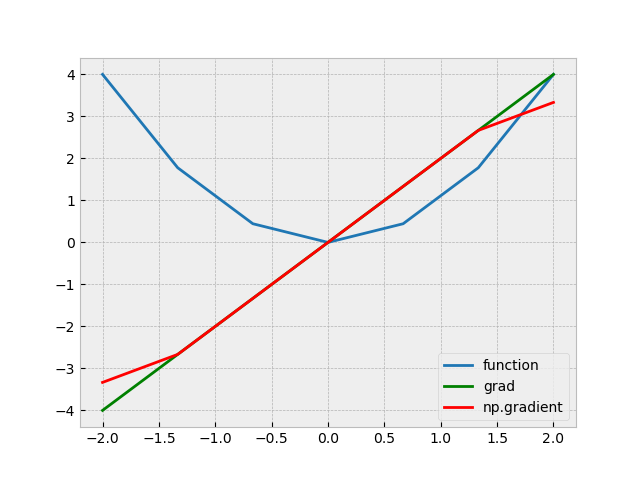

In [10]:
fig, ax = plt.subplots()
ax.plot(arg_pts, pow2_pts,c="tab:blue", label="function")
ax.plot(arg_pts, pow2_tru_grad,  c="g", label="grad")
ax.plot(arg_pts, pow2_num_grad,  c="r", label="np.gradient")
plt.legend()
plt.show()

In [11]:
# gradients for sin(x):
sin_pts = np.sin(arg_pts)

sin_num_grad = np.gradient(sin_pts, arg_pts)
sin_tru_grad = np.cos(arg_pts)

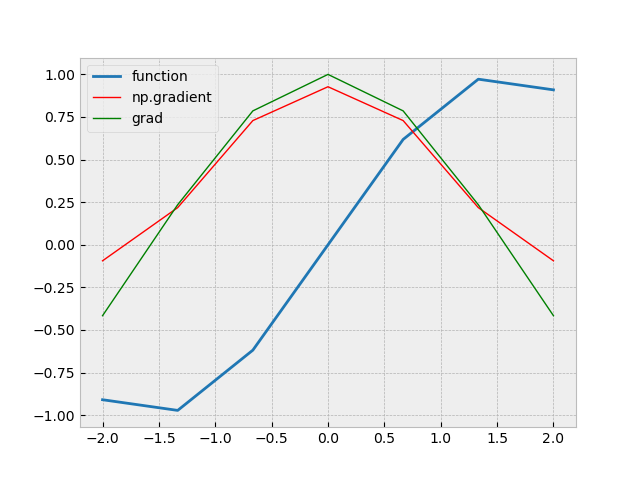

In [12]:
fig2, ax2 = plt.subplots()
ax2.plot(arg_pts, sin_pts, c="tab:blue",lw=2, label="function")
ax2.plot(arg_pts, sin_num_grad,c="r",   lw=1, label="np.gradient")
ax2.plot(arg_pts, sin_tru_grad,c="g",   lw=1, label="grad")
plt.legend()
plt.show()

### Endpoints
Notice the difference on the edge of the definition, there is a remedy for that, namely additional argument edge_order=2 which\
causes np.gradient to use higier order aproximation and for the above functions it removes outliers at the edges.

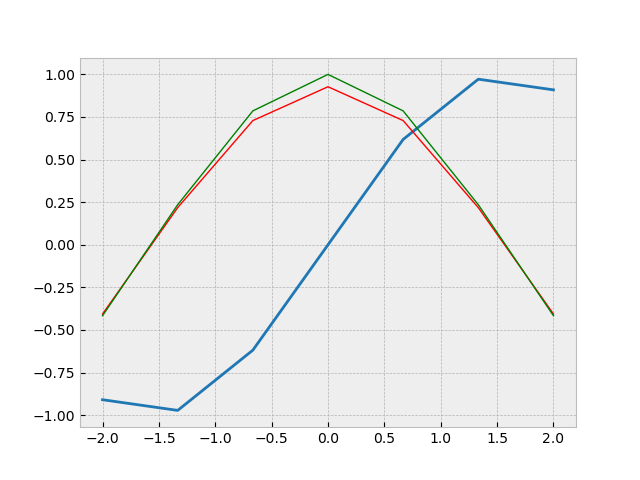

In [13]:
# compare with edge_order=2
sin_pts = np.sin(arg_pts)

sin2_num_grad = np.gradient(sin_pts, arg_pts, edge_order=2)
sin2_tru_grad = np.cos(arg_pts)

fig3, ax3 = plt.subplots()
ax3.plot(arg_pts, sin_pts, c="tab:blue",lw=2, label="function")
ax3.plot(arg_pts, sin2_num_grad,c="r",lw=1)
ax3.plot(arg_pts, sin2_tru_grad,c="g",lw=1)
plt.show()

##### What if the data is not sorted

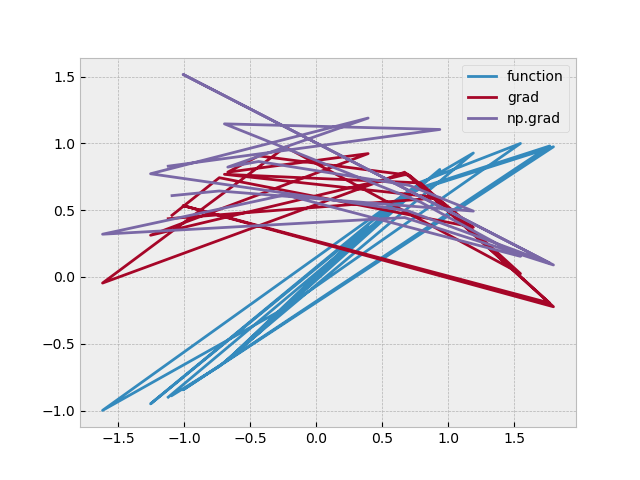

In [14]:
# random data
rng = np.random.default_rng(12345)

lbound, rbound, num = -2, 2, 20
x_rand = lbound + (rbound - lbound) * rng.random(num)
y_rand_sin = np.sin(x_rand)
y_rand_tru_grad = np.cos(x_rand)
y_rand_num_grad = np.gradient(y_rand_sin, x_rand)

fig4, ax4 = plt.subplots()
ax4.plot(x_rand, y_rand_sin, label="function")
ax4.plot(x_rand, y_rand_tru_grad, label="grad")
ax4.plot(x_rand, y_rand_num_grad, label="np.grad")
plt.legend()
plt.show()



##### we need to sort the data for np.gradient
Check [advanced-indexing](https://numpy.org/doc/stable/user/basics.indexing.html?highlight=slice#advanced-indexing), for the maning of\
```arr[ not a tuple object ]```, for example ```arr[ list ]``` or ```arr[ list of lists ]```

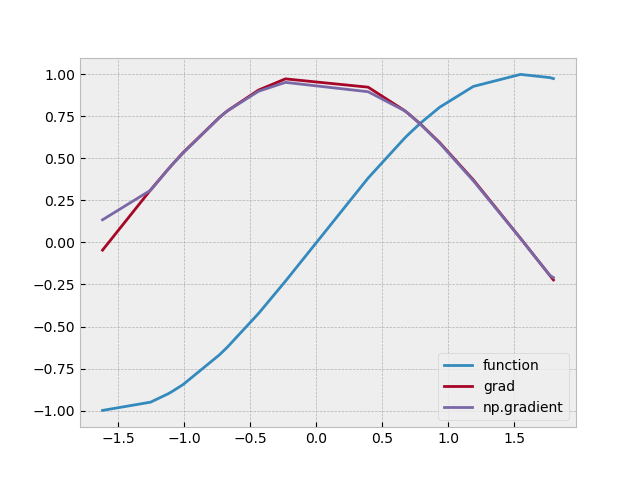

In [15]:
data_rand = np.array([x_rand, y_rand_sin])

# get the indecies of a sorted first row (with .argsort()) and change the order of both rows:
data_sorted = data_rand[:, data_rand[0,:].argsort() ]

data_grad = np.copy(data_sorted)
data_grad[1] = np.cos(data_grad[0])

data_npgrad = np.copy(data_sorted)
data_npgrad[1] = np.gradient(data_npgrad[1], data_npgrad[0])

fig5, ax5 = plt.subplots()
ax5.plot(*data_sorted, label="function")
ax5.plot(*data_grad, label="grad")
ax5.plot(*data_npgrad, label="np.gradient")
plt.legend()
plt.show()

### More dimensions in the argument
let's calculate the gradient of a function $$(x,y)\quad\longrightarrow\quad -\frac{x^2}{4}-\frac{y^2}{4}$$

#### Evenly spaced points
We calculate data arrays and find np.gradient

In [16]:
# argument data 2D
x_lbound, x_rbound, x_num = -3, 2, 6
y_lbound, y_rbound, y_num = -3, 2, 6
pts_dist = np.abs(x_rbound - x_lbound)/(x_num-1)

x_arg_pts = np.linspace(x_lbound, x_rbound, x_num)
y_arg_pts = np.linspace(y_lbound, y_rbound, y_num)

x_s, y_s = np.meshgrid(x_arg_pts, y_arg_pts)

In [110]:
poly1_val = - (x_s**2)/4 - (y_s**2)/4
#x_s, y_s
poly1_true_grad_x, poly1_true_grad_y = - (x_s)/2, - (y_s)/2
poly1_num_grad = np.gradient(poly1_val, pts_dist, edge_order=2)

# print(f"tru grad_y =\n{poly1_true_grad_y},\n tru grad_x = \n{poly1_true_grad_x}")
# print(f"num grad_y =\n{poly1_num_grad[0]},\n num_grad_x \n{poly1_num_grad[1]}")
poly1_num_grad_y, poly1_num_grad_x = np.gradient(poly1_val, pts_dist, edge_order=2)

array([[ 1.5,  1. ,  0.5,  0. , -0.5, -1. ],
       [ 1.5,  1. ,  0.5,  0. , -0.5, -1. ],
       [ 1.5,  1. ,  0.5,  0. , -0.5, -1. ],
       [ 1.5,  1. ,  0.5,  0. , -0.5, -1. ],
       [ 1.5,  1. ,  0.5,  0. , -0.5, -1. ],
       [ 1.5,  1. ,  0.5,  0. , -0.5, -1. ]])

#### 3D plots of function and its gradient.
Note the difference in function definition

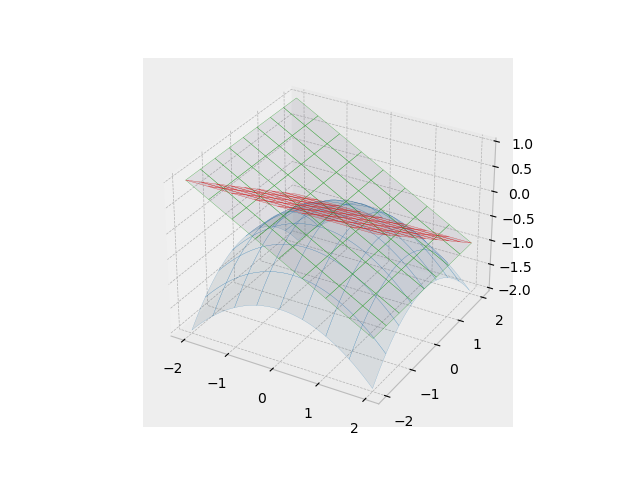

In [199]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

# our function is sum of the same monomial at two variables, thus we can use:
mono = np.poly1d([-0.25,0,0], r=False)

# data creation, square in the domain with 
# lower left corner  = ll = (lb, lb) and 
# upper right corner = ur = (rb, rb)
ll, ur, step = -2, 2, 0.1

x_3d, y_3d = np.mgrid[ ll:ur+step:step, ll:ur+step:step ]
z_3d = mono(x_3d) + mono(y_3d) # function data

f_grad_y,f_grad_x = np.gradient(z_3d, step, edge_order=2) #grad data

# Plot the 3D surface
ax_3d = plt.figure().add_subplot(projection='3d')
ax_3d.plot_surface(x_3d, y_3d, z_3d, edgecolor="tab:blue", lw=0.1, rstride=5, cstride=5, alpha=0.1)
# # with options: rstride=20, cstride=50; one can observe the trick how projection='3d' is rendering the surface.

# Plot the gradients
ax_3d.plot_surface(x_3d, y_3d, f_grad_x, edgecolor="tab:red", lw=0.2, rstride=5, cstride=5, alpha=0.1)
ax_3d.plot_surface(x_3d, y_3d, f_grad_y, edgecolor="tab:green", lw=0.2, rstride=5, cstride=5, alpha=0.1)

plt.show()

#### For set of points that is non-uniform but grid-preserving
we have to feed np.gradient with lists of projections on axis,\
chcek varargs parameter in numpy reference [np.grad](https://numpy.org/doc/stable/reference/generated/numpy.gradient.html) option 3.

In [2]:
import numpy as np
rng = np.random.default_rng(123456)
from scipy.stats import norm

# nonuniform, nonequilateral grid of points:
sample_size_x, sample_size_y = 50, 50
x_sample, y_sample = rng.standard_normal(sample_size_x), rng.standard_normal(sample_size_y)
x_nuni, y_nuni = np.meshgrid(np.sort(x_sample), np.sort(y_sample))

# # One can check how the domain points looks like:
# fig_dom,ax_dom = plt.subplots()
# ax_dom.scatter(x_nuni,y_nuni)
# plt.show()

We are going to plot the derivative of density of gauss distribution.\
First the plot of the density itself.

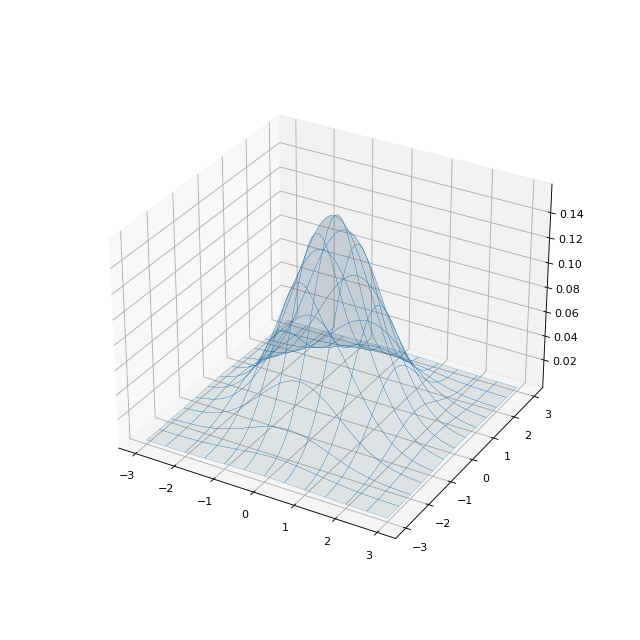

In [3]:
%matplotlib widget
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from scipy.stats import multivariate_normal

ran_var = multivariate_normal(mean=[0, 0], cov=[[1, 0], [0, 1]])
# Note: ran_var has a method .pdf which gives us a density function of the ran_var "variable".

ll, ur, step = -3, 3, 0.1
x_pdf, y_pdf = np.mgrid[ ll:ur+step:step, ll:ur+step:step ]
z_pdf = ran_var.pdf( np.dstack([x_pdf, y_pdf]) )

# Ran_Var.pdf accept
# Note: np.dstack return lists of k-dimentional "points" from separate lists of x_1 coordinates, x_2 coordinates, ..., x_k coordinates.
# e.g. x_pdf.shape = (41, 41), y_pdf.shape = (41, 41), then:
#     np.stack([x_pdf, y_pdf]).shape  = (2, 41, 41)    <- " two arrays (41,41)"
#     np.dstack([x_pdf, y_pdf]).shape = (41, 41, 2)    <- " 41 x 41 arrays of the length 2"

ax_3d = plt.figure(figsize=(8, 8), dpi=80).add_subplot(projection='3d')
ax_3d.plot_surface(x_pdf, y_pdf, z_pdf, edgecolor="tab:blue", lw=0.2, rstride=5, cstride=5, alpha=0.1)
plt.show()

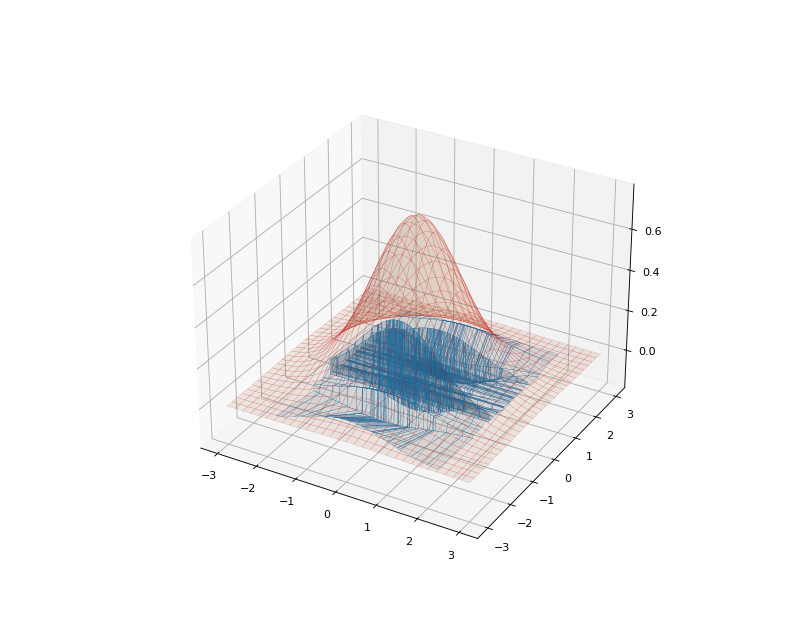

In [5]:
#gradients at our nonuniform grid:
pdf_z_uni = ran_var.pdf( np.dstack([x_nuni, y_nuni]) )
nuni_grad_y, nuni_grad_x = np.gradient(pdf_z_uni, y_sample, x_sample, edge_order=2)

ax_uuni_3d = plt.figure(figsize=(10, 8), dpi=80).add_subplot(projection='3d')
ax_uuni_3d.plot_surface(x_nuni, y_nuni, nuni_grad_y, edgecolor="tab:blue", lw=0.2, alpha=0.1)
ax_uuni_3d.plot_surface(x_pdf, y_pdf, 5*z_pdf, edgecolor="tab:red", lw=0.1, rstride=2, cstride=2, alpha=0.1)
plt.show()
# whats is wrong ?

#### Exercise: Calculate gradient of a function given at random sample points (no grid structure of arguments).
This is "true" exercise, i dont know the answer, some ideas(or misleading ideas):
1) gridization (minimal grid that contain the sample) of a random sample with some aproximation of\
    points in between (seems hard if for example our random sample is set of points on a circle,\
    we only have values on the circle but we have to fill the disk, some sort of interpolation )
2) triangulation of a sample and take some meaningful minimal grid.

### Linear regression
Start with set of points with random "noise"

In [24]:
import numpy as np
rng = np.random.default_rng(12345)

import matplotlib.pyplot as plt

# # basic definitions and constant setup
def line(a, x):
    """self code review:  np.poly1d is more versatile and already in numpy lib no need for function called line"""
    return a*x

num = 100
standard_deviation = 5
min_slope, max_slope = -10, 10
lbound, rbound = -11, 12

slope = 6.1718809209239325


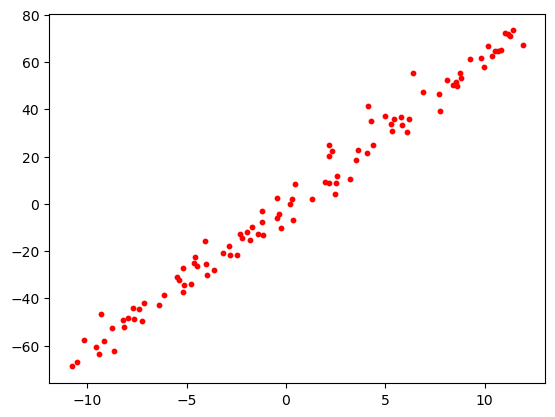

In [27]:
# # random data generation
slope = min_slope + (max_slope - min_slope) * rng.random() # random slope in [min_slope, max_slope) range
x = lbound + (rbound - lbound) * rng.random(num)           # random first coordinate
noise = standard_deviation * rng.standard_normal(num)      # the noise

# # putting *line with *noise together
arr = np.stack((x, noise), axis=0).T
pts = np.apply_along_axis(lambda pt : np.array([pt[0], line(slope, pt[0]) + pt[1]]), axis=1, arr=arr)

print(f'slope = {slope}')
plt.scatter(*pts.T, s=10, c='red')
plt.show()

#### NUMPY

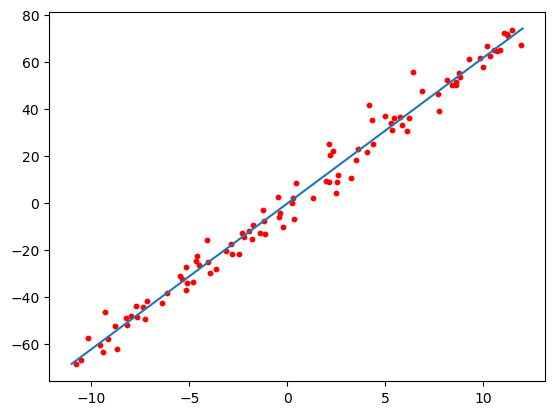

In [76]:
# NUMPY linear regression (check also np.linalg.lstsq)
m,b = np.polyfit(pts.T[0], pts.T[1], deg=1)

x = np.linspace(lbound, rbound, 10)
y = m*x+b

plt.plot(x,y)
plt.scatter(*pts.T, s=10, c='red')
plt.show()

##### More with polyfit

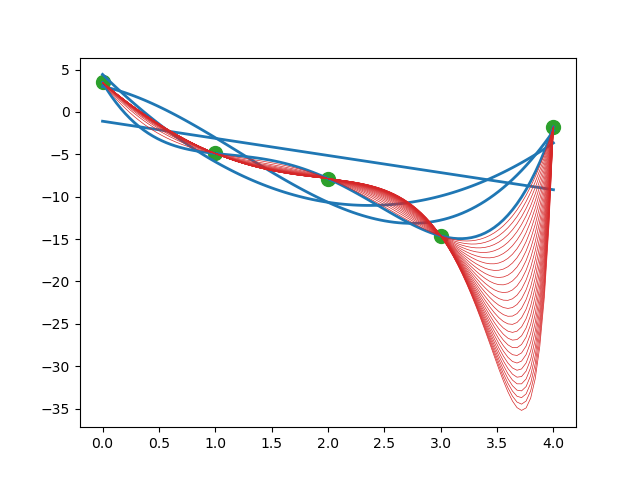

In [69]:
# with polyfit is is easy to see the wild oscillations with too high degree compared with the data.

import numpy as np
import matplotlib.pyplot as plt

rng = np.random.default_rng(14)
%matplotlib widget


import warnings
warnings.simplefilter('ignore', np.RankWarning)

# 2 numbers to control the figure
num_of_data = 5
overhead = 25

# small data generation
x_data = np.arange(0, num_of_data)
y_data = 5*rng.standard_normal(num_of_data)

# plotting must-lines 
x = np.linspace(0, x_data[-1], 100)
fig, ax = plt.subplots()

max_deg = num_of_data + overhead
for i in range(max_deg):
    numpy_poly = np.polyfit(x_data,y_data, deg=1+i, full=False)
    ax.plot(x, np.poly1d(numpy_poly)(x),
            c= "tab:blue" if i<num_of_data-1 else "tab:red",
            lw= 2 if i<num_of_data-1 else 0.5)
ax.scatter(x_data,y_data, s=100, c='tab:green')
plt.show()

##### numpy.linalg.lstsq
least-squares solution to a linear matrix equation

#### SCIPY

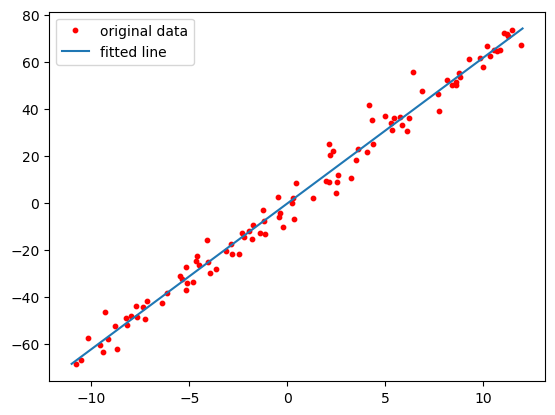

In [34]:
# SCIPY linear regression 

if 'x' in globals(): del x
if 'y' in globals(): del y
from scipy import stats

res = stats.linregress(pts.T[0], pts.T[1])

x = np.linspace(lbound, rbound, 10)

plt.plot(*pts.T, 'o', c='r', markersize=np.sqrt(10), label='original data')
plt.plot(x, res.intercept + res.slope*x, 'tab:blue', label='fitted line')
plt.legend()

# Notice the markersize and compare with s=10 in plt.scatter above, why is that? Asn: (also notice the author)
# https://stackoverflow.com/questions/14827650/pyplot-scatter-plot-marker-size/47403507#47403507

#### SKLEARN

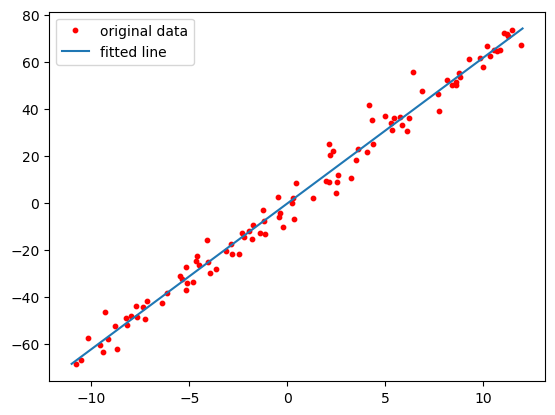

In [35]:
# linear regression ML sklearn 
from sklearn.linear_model import LinearRegression

if 'x' in globals(): del x
if 'y' in globals(): del y

reg = LinearRegression()       # this is our black-box 

""" We feed black box data about x and y coordiinates 
    LinearRegression do not accept 1-dim arrays therefore *.reshape(-1,1) """
reg.fit( pts.T[0].reshape(-1,1), pts.T[1].reshape(-1,1) ) 

x = np.linspace(lbound, rbound, 10).reshape(-1,1)
y = reg.predict(x)            # here we USE the model reg

plt.plot(*pts.T, 'o', c='r', markersize=np.sqrt(10), label='original data')
plt.plot(x, y, label='fitted line')
plt.legend()

# # What is going on outside lbound, rbound:
# x_out = np.linspace(lbound-50, rbound+50, 10).reshape(-1,1)
# y_out = reg.predict(x_out)
# plt.plot(x_out, y_out, 'r')
# plt.show()

### Polynomial Regression
Packages numpy, scipy and sklearn provide functions to approximate data with polynomial functions.

In [39]:
# First we need to generate polynmial data (check np.polyval )
if 'x' in globals(): del x
if 'y' in globals(): del y

num, standard_deviation = 100, 20
p = np.array([.2, -2,-4, .1]) # polynomial coefficients

x = lbound + (rbound - lbound) * rng.random(num)
y = np.polyval(p, x) + standard_deviation * rng.standard_normal(num) 

# fig, ax = plt.subplots()
# ax.plot(x,y, 'o', label='original data')
# plt.show()

#### In scipy

In [40]:
# in scipy there is module called: Orthogonal distance regression 
from scipy import odr

# creating a model
poly_model = odr.polynomial(order=3)

# feed our point into the model
data = odr.Data(x, y) # check: data.__dict__

```poly_model``` is out particaluar model we gonna train,\
```data``` is data prepared by scipy to feed models.\
The traning is performed by executing .run on a [function called ODR](https://docs.scipy.org/doc/scipy/reference/generated/scipy.odr.ODR.html#scipy.odr.ODR) which gather the model and the data.

In [41]:
odr_obj = odr.ODR(data, poly_model) # ODR pair data and model
output = odr_obj.run() # here traning is performed

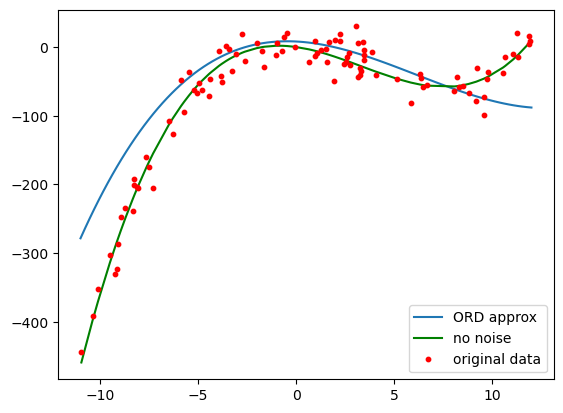

In [44]:
poly_coeff = output.beta[::-1] # [::-1] is axis=0 backwards, since slicing works like this [start:stop:step]

x_even_pts = np.linspace(lbound, rbound, 100)
y_scipy_val = np.polyval(poly_coeff, x_even_pts)

fig, ax = plt.subplots()
ax.plot(x_even_pts, y_scipy_val, label='ORD approx')
ax.plot(np.sort(x), np.polyval(p, np.sort(x)), c='g', label='no noise')
ax.plot(x,y, 'o',c='r', markersize=np.sqrt(10), label='original data')
plt.legend()
plt.show()
# for ORD fit is quite bad, what is wrong?

#### In sklearn

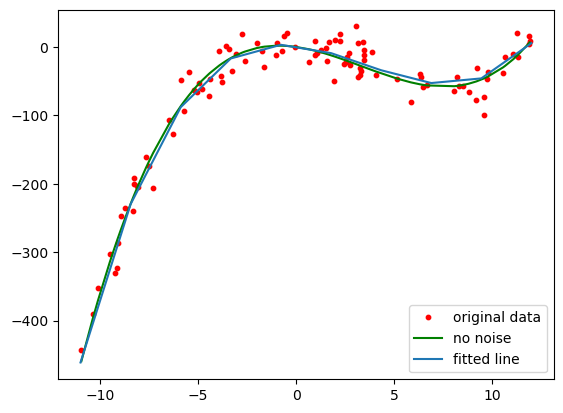

In [46]:
# using sklearn ( below example is taken from https://youtu.be/H8kocPOT5v0 )
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# inform the model that you want polynomial approximation
poly_features = PolynomialFeatures(degree = 3, include_bias=False)
x_poly = poly_features.fit_transform(x.reshape(-1,1)) 

# traning
reg = LinearRegression()
reg.fit( x_poly, y.reshape(-1,1) ) 

# where you want to plot
x_plot = np.linspace(lbound, rbound, 10).reshape(-1,1)

# getting the data from the model
x_plot_poly = poly_features.transform(x_plot)
y_plot_poly = reg.predict(x_plot_poly)

fig, ax = plt.subplots()
ax.plot(x,y, 'o', c='r', markersize=np.sqrt(10), label='original data')
ax.plot(np.sort(x), np.polyval(p, np.sort(x)), 'g', label='no noise')
ax.plot(x_plot, y_plot_poly, label='fitted line')
plt.legend()
plt.show()

In [158]:
# using scipy

5